In [79]:
import os
import sys
# module_path = os.path.abspath(os.path.join('../umlsparser'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt



C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_7200\3653252979.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


 UMLS <br>
○ Get familiar with the offline UMLS <br>
○ Be aware of where we're extracting subgraphs<br>
○ Read into what vocabularies<br>
○ Understand what categories and topics really exist<br>
○ What topics and terminologies are being used<br>
○ Check recording at 11:28<br>
○ Diseases drugs and genes<br>
• Use MRCONSO.RRF<br>
○ A few things missing from here from the full UMLS<br>
• MRCONSO.RRF UMLS GitHUB<br>
• BioBART, SciFive - look at these models<br>
○ Do tutorials on these<br>
 T5 and BART tutorials<br>

## Concepts and Sources

In [2]:
# check contents

with open ('2023AA/META/MRCONSO.RRF') as f:
    for i in range(5):
        line = f.readline()
        print(line)

C0000005|ENG|P|L0000005|PF|S0007492|Y|A26634265||M0019694|D012711|MSH|PEP|D012711|(131)I-Macroaggregated Albumin|0|N|256|

C0000005|ENG|S|L0270109|PF|S0007491|Y|A26634266||M0019694|D012711|MSH|ET|D012711|(131)I-MAA|0|N|256|

C0000005|FRE|P|L6220710|PF|S7133957|Y|A13433185||M0019694|D012711|MSHFRE|PEP|D012711|Macroagrégats d'albumine marquée à l'iode 131|3|N||

C0000005|FRE|S|L6215648|PF|S7133916|Y|A27488794||M0019694|D012711|MSHFRE|ET|D012711|MAA-I 131|3|N||

C0000005|FRE|S|L6215656|PF|S7133956|Y|A27614225||M0019694|D012711|MSHFRE|ET|D012711|Macroagrégats d'albumine humaine marquée à l'iode 131|3|N||



In [3]:
df = pd.read_csv('2023AA/META/MRCONSO.RRF', delimiter = '|')
df.shape

C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_7200\3328187778.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2023AA/META/MRCONSO.RRF', delimiter = '|')


(13501907, 19)

In [4]:
df.head()

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Unnamed: 18
0,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0,N,256.0,NaN
1,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3,N,NaN,NaN
2,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3,N,NaN,NaN
3,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'i...,3,N,NaN,NaN
4,C0000005,SWE,P,L17197376,PF,S20758072,Y,A33245954,NaN,M0019694,D012711,MSHSWE,ET,D012711,(131)I-Makroaggregerat albumin,3,N,NaN,NaN


In [5]:
def clean_data(data):
    cols = data.columns
    empty_cols = list(filter(lambda x: 'unnamed' in x.lower(), cols))
    data = data.shift(1)
    data.loc[0] = cols
    for col in empty_cols:
        if data[col].isna().mean() > 0.99:
            data = data.drop(col, axis = 1)
        else:
            data.loc[0,col] = np.nan
    return data

df = clean_data(df)

In [6]:
df.head(2)

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0


In [7]:
df.columns = ['CUI','LAT','TS','LUI','STT',
              'SUI','ISPREF','AUI','SAUI',
              'SCUI','SDUI','SAB','TTY',
              'CODE','STR','SRL','SUPPRESS',
              'CVF']

In [8]:
df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3.0,N,NaN
3,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3.0,N,NaN
4,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'i...,3.0,N,NaN


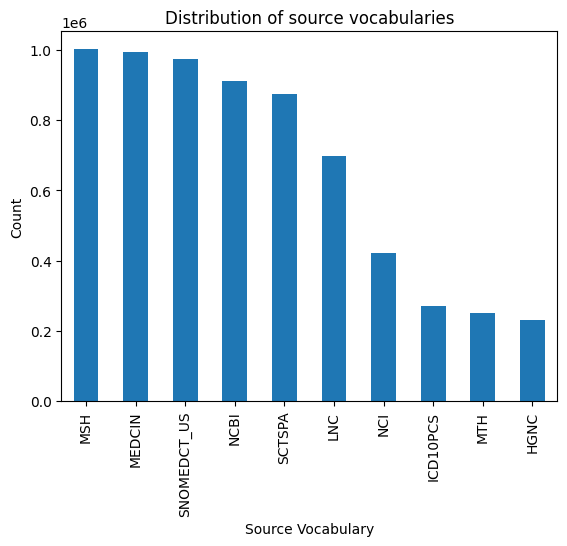

In [9]:
# Source distribution
df.SAB.value_counts()[:10].plot(kind = 'bar')
plt.xlabel("Source Vocabulary")
plt.ylabel("Count")
plt.title("Distribution of source vocabularies")
plt.show()

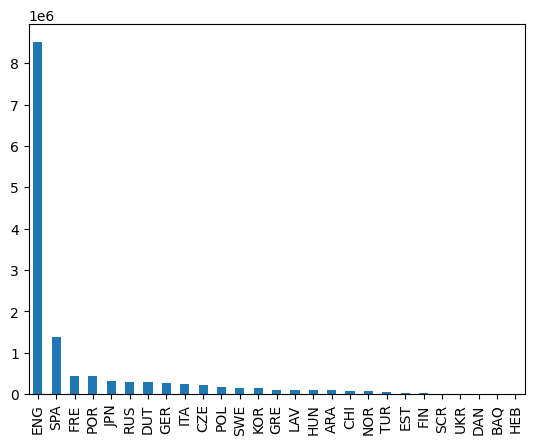

In [10]:
df.LAT.value_counts().plot(kind = 'bar')
plt.show()

In [11]:
# English only
df = df[df.LAT == 'ENG'].reset_index(drop = True)

In [12]:
df.shape

(8510800, 18)

In [13]:
df.head(3)

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0


In [14]:
# check TTY - term types
# these seem useful
df.TTY.value_counts()

PT        2094740
SY        1335271
FN         793410
SCN        696462
NM         321747
           ...   
SCALE           3
CC              1
DT              1
CCS             1
MTH_OS          1
Name: TTY, Length: 185, dtype: int64

In [15]:
# look at ref data if anything is of interest
docs = pd.read_csv('2023AA/META/MRDOC.RRF', delimiter = '|', low_memory = False)
docs = clean_data(docs)
docs.columns = ['DOCKEY','VALUE','TYPE','EXPL']
docs.head()

,DOCKEY,VALUE,TYPE,EXPL
0,ATN,AAL_TERM,expanded_form,AAL term
1,ATN,ACCEPTABILITYID,expanded_form,Acceptability Id
2,ATN,ACCEPTED_THERAPEUTIC_USE_FOR,expanded_form,Accepted therapeutic use for
3,ATN,ACTIVE,expanded_form,Active
4,ATN,ADDED_MEANING,expanded_form,Additional descriptive information


In [16]:
# doesn't show much here
docs[(docs.TYPE == 'tty_class')].sample(5)

,DOCKEY,VALUE,TYPE,EXPL
3269,TTY,POS,tty_class,preferred
2982,TTY,AC,tty_class,preferred
3236,TTY,NX,tty_class,synonym
3014,TTY,CD,tty_class,preferred
3277,TTY,PSN,tty_class,preferred


In [17]:
# found from UMLS website
zz = '''
AA	Attribute type abbreviation
AB	Abbreviation in any source vocabulary
ACR	Acronym
AC	Activities
AD	Adjective
AM	Short form of modifier
AS	Attribute type synonym
AT	Attribute type
BD	Fully-specified drug brand name that can be prescribed
BN	Fully-specified drug brand name that can not be prescribed
BPCK	Branded Drug Delivery Device
BR	Binding realm
CA2	ISO 3166-1 standard country code in alpha-2 (two-letter) format
CA3	ISO 3166-1 standard country code in alpha-3 (three-letter) format
CCN	Chemical code name
CCS	FIPS 10-4 country code
CC	Trimmed ICPC component process
CDA	Clinical drug name in abbreviated format
CDC	Clinical drug name in concatenated format (NDDF), Clinical drug name (NDFRT)
CDD	Clinical drug name in delimited format
CDO	Concept domain
CD	Clinical Drug
CE	Entry term for a Supplementary Concept
CHN	Chemical structure name
CL	Class
CMN	Common name
CN	LOINC official component name
CO	Component name (these are hierarchical terms, as opposed to the LOINC component names which are analytes)
CPR	Concept property
CP	ICPC component process (in original form)
CR	Concept relationship
CSN	Chemical Structure Name
CSY	Code system
CS	Short component process in ICPC, i.e. include some abbreviations
CU	Common usage
CV	Content view
CX	Component, with abbreviations expanded.
DC10	Diagnostic criteria for ICD10 code
DC9	Diagnostic criteria for ICD9 code
DEV	Descriptor entry version
DE	Descriptor
DFG	Dose Form Group
DF	Dose Form
DI	Disease name
DN	Display Name
DO	Domain
DP	Drug Product
DSV	Descriptor sort version
DS	Short form of descriptor
DT	Definitional term, present in the Metathesaurus because of its connection to a Dorland's definition or to a definition created especially for the Metathesaurus
EP	Print entry term
EQ	Equivalent name
ES	Short form of entry term
ETAL	Entry Term Alias
ETCF	Entry term, consumer friendly description
ETCLIN	Entry term, clinician description
ET	Entry term
EX	Expanded form of entry term
FBD	Foreign brand name
FI	Finding name
FN	Full form of descriptor
FSY	Foreign Synonym
GLP	Global period
GN	Generic drug name
GO	Goal
GPCK	Generic Drug Delivery Device
GT	Glossary term
HC	Hierarchical class
HD	Hierarchical descriptor
HGJKN1	Japanese High Level Group Term (kana1)
HGJKN	Japanese High Level Group Term (kana)
HG	High Level Group Term
HS	Short or alternate version of hierarchical term
HTJKN1	Japanese Hierarchical term (kana1)
HTJKN	Japanese Hierarchical term (kana)
HTN	HL7 Table Name
HT	Hierarchical term
HX	Expanded version of short hierarchical term
ID	Nursing indicator
IN	Name for an ingredient
IS	Obsolete Synonym
IT	Index term
IVC	Intervention categories
IV	Intervention
LA	LOINC answer
LC	Long common name
LG	LOINC group
LLTJKN1	Japanese Lower Level Term (kana1)
LLTJKN	Japanese Lower Level Term (kana)
LLT	Lower Level Term
LN	LOINC official fully specified name
LO	Obsolete official fully specified name
LPDN	LOINC parts display name
LPN	LOINC parts name
LS	Expanded system/sample type (The expanded version was created for the Metathesaurus and includes the full name of some abbreviations.)
LVDN	Linguistic variant display name
LV	Lexical variant
MD	CCS multi-level diagnosis categories
MH	Main heading
MIN	name for a multi-ingredient
MP	Preferred names of modifiers
MS	Multum names of branded and generic supplies or supplements
MTH_ACR	MTH acronym
MTH_CN	MTH Component, with abbreviations expanded.
MTH_ET	Metathesaurus entry term
MTH_FN	MTH Full form of descriptor
MTH_HG	MTH High Level Group Term
MTH_HT	MTH Hierarchical term
MTH_HX	MTH Hierarchical term expanded
MTH_IS	Metathesaurus-supplied form of obsolete synonym
MTH_LLT	MTH Lower Level Term
MTH_LN	MTH Official fully specified name with expanded abbreviations
MTH_LO	MTH Expanded LOINC obsolete fully specified name
MTH_OAF	Metathesaurus-supplied form of obsolete active fully specified name
MTH_OAP	Metathesaurus-supplied form of obsolete active preferred term
MTH_OAS	Metathesaurus-supplied form of obsolete active synonym
MTH_OET	Metathesaurus obsolete entry term
MTH_OF	Metathesaurus-supplied form of obsolete fully specified name
MTH_OL	MTH Non-current Lower Level Term
MTH_OPN	Metathesaurus obsolete preferred term, natural language form
MTH_OP	Metathesaurus obsolete preferred term
MTH_OS	MTH System-organ class
MTH_PTGB	Metathesaurus-supplied form of British preferred term
MTH_PTN	Metathesaurus preferred term, natural language form
MTH_PT	Metathesaurus preferred term
MTH_RXN_BD	RxNorm Created BD
MTH_RXN_CDC	RxNorm Created CDC
MTH_RXN_CD	RxNorm Created CD
MTH_RXN_DP	RxNorm Created DP
MTH_SI	MTH Sign or symptom of
MTH_SMQ	Metathesaurus version of Standardised MedDRA Query
MTH_SYGB	Metathesaurus-supplied form of British synonym
MTH_SY	MTH Designated synonym
MV	Multi-level procedure category
N1	Chemical Abstracts Service Type 1 name of a chemical
NA	Name aliases
NM	Name of Supplementary Concept
NPT	HL7 non-preferred for language term
NP	Non-preferred term
NS	Short form of non-preferred term
NX	Expanded form of non-preferred term
OAF	Obsolete active fully specified name
OAM	Obsolete Modifier Abbreviation
OAP	Obsolete active preferred term
OAS	Obsolete active synonym
OA	Obsolete abbreviation
OC	Nursing outcomes
OET	Obsolete entry term
OF	Obsolete fully specified name
OLC	Obsolete Long common name
OLG	Obsolete LOINC group name
OLJKN1	Japanese Non-current Lower Level Term (kana1)
OLJKN	Japanese Non-current Lower Level Term (kana)
OL	Non-current Lower Level Term
OM	Obsolete modifiers in HCPCS
ONP	Obsolete non-preferred for language term
OOSN	Obsolete official short name
OPN	Obsolete preferred term, natural language form
OP	Obsolete preferred name
OR	Orders
OSJKN1	Japanese System-organ class in the WHO Adverse Reaction Terminology (kana1)
OSJKN	Japanese System-organ class in the WHO Adverse Reaction Terminology (kana)
OSN	Official short name
OS	System-organ class
PCE	Preferred entry term for Supplementary Concept
PC	Preferred "trimmed term" in ICPC
PEP	Preferred entry term
PHENO_ET	Phenotype entry term
PHENO	Phenotype
PIN	Name from a precise ingredient
PM	Machine permutation
PN	Metathesaurus preferred name
POS	Place of service
PQ	Qualifier for a problem
PR	Name of a problem
PSC	Protocol selection criteria
PSN	Prescribable Names
PS	Short forms that needed full specification
PTAV	Preferred Allelic Variant
PTCS	Preferred Clinical Synopsis
PTGB	British preferred term
PTJKN1	Japanese Designated preferred name (kana1)
PTJKN	Japanese Designated preferred name (kana)
PTN	Preferred term, natural language form
PT	Designated preferred name
PXQ	Preferred qualifier term
PX	Expanded preferred terms (pair with PS)
QAB	Qualifier abbreviation
QEV	Qualifier entry version
QSV	Qualifier sort version
RAB	Root abbreviation
RHT	Root hierarchical term
RPT	Root preferred term
RSY	Root synonym
RS	Extracted related names in SNOMED2
RT	Term that is related to, but often considered non-synonymous with, the preferred term
RXN_IN	Rxnorm Preferred Ingredient
RXN_PT	Rxnorm Preferred
SBDC	Semantic Branded Drug Component
SBDF	Semantic branded drug and form
SBDG	Semantic branded drug group
SBD	Semantic branded drug
SB	Named subset of a source
SCALE	Scale
SCDC	Semantic Drug Component
SCDF	Semantic clinical drug and form
SCDG	Semantic clinical drug group
SCD	Semantic Clinical Drug
SCN	Scientific name
SC	Special Category term
SD	CCS diagnosis categories
SI	Name of a sign or symptom of a problem
SMQ	Standardised MedDRA Query
SP	CCS procedure categories
SSN	Source short name, used in the UMLS Knowledge Source Server
SS	Synonymous "short" forms
ST	Step
SU	Active Substance
SX	Mixed-case component synonym with expanded abbreviations
SYGB	British synonym
SYN	Designated alias
SY	Designated synonym
TA	Task
TC	Term class
TG	Name of the target of an intervention
TMSY	Tall Man synonym
TQ	Topical qualifier
TX	CCPSS synthesized problems for TC termgroup
UCN	Unique common name
UE	Unique equivalent name
USN	Unique scientific name
USY	Unique synonym
VAB	Versioned abbreviation
VPT	Versioned preferred term
VSY	Versioned synonym
VS	Value Set
XD	Expanded descriptor in AOD
XM	Cross mapping set
XQ	Alternate name for a qualifier
'''
zz = zz.split('\n')

In [36]:

# create dictionary for term type mapping
zz = list(filter(lambda x: '\t' in x, zz))
aa = [x.split('\t')[0] for x in zz]
bb = [x.split('\t')[1] for x in zz]
type_dict = {}
for i in range(len(aa)):
    type_dict[aa[i]] = bb[i]
df['term_type'] = df.TTY.apply(lambda x: type_dict[x] if type(x) != float else x)
df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Preferred entry term
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0,Entry term
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Name for an ingredient
3,C0000039,ENG,P,L0000039,PF,S17175117,Y,A28572604,NaN,NaN,NaN,MTH,PN,NOCODE,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Metathesaurus preferred name
4,C0000039,ENG,P,L0000039,VC,S0007564,Y,A0016515,NaN,M0023172,D015060,MSH,MH,D015060,"1,2-Dipalmitoylphosphatidylcholine",0.0,N,NaN,Main heading


In [37]:
df['term_type'].value_counts()[:10]

Designated preferred name                 2094740
Designated synonym                        1335271
Full form of descriptor                    793410
Scientific name                            696462
Name of Supplementary Concept              321747
Entry term for a Supplementary Concept     319585
Metathesaurus preferred name               248479
Entry term                                 197694
Drug Product                               143081
Machine permutation                        129283
Name: term_type, dtype: int64

In [38]:
df_snomed = df[df.SAB == 'SNOMEDCT_US'].copy().reset_index(drop = True)

- understand categories of topics
- start with 1-2 hops
- consider 1:1, 1:m, m:n relations
- get 5000 samples of each hop count and relation type - for each broader topic (e.g. genes, proteins etc.)
- In next two weeks

## Semantic Types

In [39]:
mrsty = pd.read_csv('2023AA/META/MRSTY.RRF', delimiter = '|', low_memory = False)
mrsty = clean_data(mrsty)
mrsty.columns = ['CUI','TUI','STN','STY','ATUI','CVF']
mrsty.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000005,T130,A1.4.1.1.4,"Indicator, Reagent, or Diagnostic Aid",AT17634323,256.0
3,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
4,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0


In [40]:
mrsty.STY.value_counts()[:10]

Therapeutic or Preventive Procedure    315831
Finding                                314363
Eukaryote                              301519
Organic Chemical                       252284
Plant                                  217622
Pharmacologic Substance                183610
Amino Acid, Peptide, or Protein        162968
Clinical Drug                          136535
Disease or Syndrome                    115796
Injury or Poisoning                    112348
Name: STY, dtype: int64

We can start investigating relationships by restricting to 10 semantic types that are familiar to us

We start by using SNOMED

In [41]:
mrsty.STY.value_counts()[:15]

Therapeutic or Preventive Procedure     315831
Finding                                 314363
Eukaryote                               301519
Organic Chemical                        252284
Plant                                   217622
Pharmacologic Substance                 183610
Amino Acid, Peptide, or Protein         162968
Clinical Drug                           136535
Disease or Syndrome                     115796
Injury or Poisoning                     112348
Clinical Attribute                      105343
Body Part, Organ, or Organ Component     92166
Gene or Genome                           85030
Biologically Active Substance            78063
Medical Device                           66873
Name: STY, dtype: int64

In [42]:
# use top 15
types = mrsty.STY.value_counts()[:15].index.tolist()
df_stype = mrsty[mrsty.STY.isin(types)].copy().reset_index(drop = True)
df_stype.shape

(2540351, 6)

In [43]:
df_snomed.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000052,ENG,S,L0006129,VC,S0604824,Y,A27781005,97198016.0,58488005,NaN,SNOMEDCT_US,SY,58488005,Branching enzyme,9.0,N,256.0,Designated synonym
2,C0000052,ENG,S,L0455267,PF,S0589116,Y,A27766654,97199012.0,58488005,NaN,SNOMEDCT_US,SY,58488005,"Amylo-(1,4,6)-transglycosylase",9.0,N,NaN,Designated synonym
3,C0000052,ENG,S,L2723740,PF,S3293422,Y,A27780666,797225014.0,58488005,NaN,SNOMEDCT_US,FN,58488005,"1,4-alpha-Glucan branching enzyme (substance)",9.0,N,NaN,Full form of descriptor
4,C0000097,ENG,S,L1024339,PF,S1234728,Y,A3230610,424399016.0,285407008,NaN,SNOMEDCT_US,PT,285407008,Methylphenyltetrahydropyridine,9.0,N,256.0,Designated preferred name


In [46]:
df.term_type.value_counts()[:5]
# df_snomed.term_type.value_counts()[:5]

Designated preferred name        2094740
Designated synonym               1335271
Full form of descriptor           793410
Scientific name                   696462
Name of Supplementary Concept     321747
Name: term_type, dtype: int64

To reduce duplicates, we'll look at only those concepts with 'designated preferred name' or 'designated synonym'

In [47]:
df_pref_all = df[df.term_type.isin(['Designated preferred name','Designated synonym'])].copy()

In [48]:
# df_pref = df_snomed[df_snomed.term_type == 'Designated preferred name'].copy()
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

We can also use the ISPREF flag to filter down further

ISPREF - Y or N for preferred string

In [49]:
df_pref_all = df_pref_all[df_pref_all.ISPREF == 'Y'].copy().reset_index(drop = True)
print(df_pref_all.shape)
print(df_pref_all.CUI.nunique())
# df_pref = df_pref[df_pref.ISPREF == 'Y'].copy().reset_index(drop = True)
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

(2743580, 19)
1476658


In [50]:
# pd.set_option('display.max_colwidth', 1000000)
# df_agg = df_pref.groupby('CUI').agg({"STR":('count','unique')})
# df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# # more than 1 instance
# df_agg[df_agg.STR_count > 1].head(10)

There is a column 'TS' that referes to term status. P - preferred LUI of CUI, S - non-preferred LUI
Restrict to only P instances

In [51]:
df_pref_all = df_pref_all[df_pref_all.TS == 'P'].reset_index(drop = True)
# df_pref = df_pref[df_pref.TS == 'P'].reset_index(drop = True)

In [52]:
print(df_pref_all.shape[0])
print(df_pref_all.CUI.nunique())
# print(df_pref.shape[0])
# print(df_pref.CUI.nunique())

1455558
1219708


In [53]:
df_agg = df_pref_all.groupby('CUI').agg({"STR":('count','unique')})
df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# more than 1 instance
df_agg[df_agg.STR_count > 1].sample(10)

,STR_count,STR_unique
CUI,,
C0029164,3,"[Dental hygiene, DENTAL HYGIENE, dental hygiene]"
C0598783,3,"[lipid metabolism, lipids metabolism, Lipids--..."
C0006052,2,"[Botulinum Toxin Type C, Botulinum toxin type C]"
C1184111,2,[Basal layer of epithelium of secondary lactif...
C2189757,2,"[visit for preoperative ENT exam, visit for: p..."
C0316443,2,"[Salmonella Rawash, Salmonella rawash]"
C0817062,2,"[Skeleton of right lower limb, Right lower lim..."
C0401283,2,"[Partial ureterectomy, partial ureterectomy]"
C0195544,2,[Endoscopic ligation and division of bilateral...


In [54]:
# based on sample above, descriptions are similar enough to keep whichever
df_pref_all = df_pref_all.drop_duplicates(subset = 'CUI', keep = 'first')
print(f"Dimensions of data are {df_pref_all.shape}")
assert df_pref_all.shape[0] == df_pref_all.CUI.nunique()
df_pref_all.head()
# # based on sample above, descriptions are similar enough to keep whichever
# df_pref = df_pref.drop_duplicates(subset = 'CUI', keep = 'first')
# print(f"Dimensions of data are {df_pref.shape}")
# assert df_pref.shape[0] == df_pref.CUI.nunique()
# df_pref.head()

Dimensions of data are (1219708, 19)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000102,ENG,P,L0000102,VC,S11842173,Y,A18589612,3.0,0000000502,NaN,CHV,PT,0000000502,1-naphthylamine,0.0,N,256.0,Designated preferred name
2,C0000163,ENG,P,L0000163,VC,S7373749,Y,A18570932,8.0,0000000503,NaN,CHV,PT,0000000503,17-hydroxycorticosteroids,0.0,N,256.0,Designated preferred name
5,C0000167,ENG,P,L0000167,VC,S11842220,Y,A18552523,11.0,0000000504,NaN,CHV,SY,0000000504,17 ketosteroids,0.0,N,NaN,Designated synonym
10,C0000172,ENG,P,L0000172,VC,S7393074,Y,A30255958,3720829011.0,103034000,NaN,SNOMEDCT_US,PT,103034000,18-hydroxycorticosterone,9.0,N,256.0,Designated preferred name


**Semantic Types are an attribute in and of itself**

**Restrict Types here**

In [55]:
df_stype.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
3,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0
4,C0000052,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT08381079,256.0


In [60]:
temp1 = df_pref_all.merge(df_stype[['CUI','ATUI','STY']], how = 'inner', on = 'CUI')
temp1.shape

(816165, 21)

In [61]:
temp1 = temp1.sort_values('CUI')
temp1 = temp1.drop_duplicates(subset = 'CUI', keep = 'first')
temp1.head()[['CUI','STR','STY']]

,CUI,STR,STY
0,C0000052,"1,4-alpha-Glucan branching enzyme","Amino Acid, Peptide, or Protein"
1,C0000102,1-naphthylamine,Organic Chemical
2,C0000163,17-hydroxycorticosteroids,Organic Chemical
3,C0000167,17 ketosteroids,Organic Chemical
4,C0000172,18-hydroxycorticosterone,Organic Chemical


In [62]:
temp1 = temp1.rename(columns = {"ATUI":"STY_ATUI"})

In [63]:
df_pref = temp1.copy()


In [64]:
df_pref = df_pref.reset_index(drop = True)

In [65]:
df_pref.shape

(788280, 21)

**TODO**
- Start getting relations using these sets of concepts as a base
- Start with single hop relations first
- Clarify what a 1:1, 1:m, m:n relationship looks like
- make sure CUI1 and CUI2 are different - CONSTRAINT
-- maybe for 1:m, we can have tails as synonyms
- create data without any restrictions

- Expand to other source vocabularies if necessary
- Relations include hierarchical ones right?

## Attribute information
Files relevant for attribute information
- MRSAT.RRF 
- MRDEF.RRF
- MRSTY.RRF
- MRHIST.RRF

In [66]:

df_attr = pd.read_csv('2023AA/META/MRSAT.RRF', delimiter = '|', low_memory = False)
df_attr = clean_data(df_attr)
df_attr.columns = ['CUI','LUI','SUI',
                   'METAUI','STYPE','CODE',
                   'ATUI','SATUI','ATN',
                   'SAB','ATV','SUPPRESS']
                  

**ATN is Attribute Name or type of attribute**

**ATV is the actual value of the attribute**

In [67]:
atn_dict = {}
with open("2023AA/AAL_TERM AAL term.txt") as f:
    text = f.readlines()
    for line in text:
        line = line.strip('\n')
        line = line.split('\t')
        atn_dict[line[0]] = line[-1]
    


In [68]:
df_attr.head()

,CUI,LUI,SUI,METAUI,STYPE,CODE,ATUI,SATUI,ATN,SAB,ATV,SUPPRESS
0,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212456753,NaN,TH,MSH,UNK (19XX),N
1,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212480766,NaN,TERMUI,MSH,T037573,N
2,C0000005,L0000005,S0007492,A26634265,SCUI,D012711,AT60774257,NaN,RN,MSH,0,N
3,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212327137,NaN,TERMUI,MSH,T037574,N
4,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212456754,NaN,TH,MSH,UNK (19XX),N


In [69]:
df_attr['ATN_name'] = df_attr.ATN.apply(lambda x: atn_dict[x])

In [70]:
df_attr = df_attr[['CUI','LUI','SUI','METAUI','STYPE','CODE','ATUI','SAB','ATV','ATN','ATN_name']]
df_attr.head()

,CUI,LUI,SUI,METAUI,STYPE,CODE,ATUI,SAB,ATV,ATN,ATN_name
0,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212456753,MSH,UNK (19XX),TH,MeSH Thesaurus ID - identifies thesauri other ...
1,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212480766,MSH,T037573,TERMUI,Term unique identifier
2,C0000005,L0000005,S0007492,A26634265,SCUI,D012711,AT60774257,MSH,0,RN,has a narrower relationship
3,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212327137,MSH,T037574,TERMUI,Term unique identifier
4,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212456754,MSH,UNK (19XX),TH,MeSH Thesaurus ID - identifies thesauri other ...


In [71]:
df_attr.ATN_name.value_counts()[:20]

Subset member                                                                                                                                                                                                                                                                             5912979
Metathesaurus Date of entry - YYYYMMDD, e.g., 19920830 - date of entry of the concept into the Metathesaurus.                                                                                                                                                                             3145081
Major revision date YYYYMMDD - date the Metathesaurus entry for the concept underwent any revision in content.                                                                                                                                                                            3145081
Step                                                                                                                              

In [72]:
df_def = pd.read_csv('2023AA/META/MRDEF.RRF', delimiter = '|', low_memory = False)
df_def.shape

(425260, 9)

In [73]:
df_def = clean_data(df_def)
df_def.columns = ['CUI','AUI','ATUI','SATUI','SAB','DEF','SUPPRESS']

In [74]:
df_def.head()

,CUI,AUI,ATUI,SATUI,SAB,DEF,SUPPRESS
0,C0000039,A0016515,AT38152019,NaN,MSH,Synthetic phospholipid used in liposomes and l...,N
1,C0000039,A11754881,AT69817678,NaN,MSHSWE,Syntetisk fosfolipid som används i liposomer o...,N
2,C0000039,A13042554,AT264439104,NaN,MSHCZE,Syntetický fosfolipid používaný v liposomech a...,N
3,C0000039,A13096036,AT254753550,NaN,MSHPOR,Fosfolipídeo sintético utilizado em lipossomos...,N
4,C0000039,A9176213,AT267611046,NaN,MSHSPA,Fosfolípido sintético que se utiliza en liposo...,N


In [80]:
df_def[df_def.SAB == 'SNOMEDCT_US'].sample(3)

,CUI,AUI,ATUI,SATUI,SAB,DEF,SUPPRESS
409842,C5547224,A33299786,AT267853605,4564333011.0,SNOMEDCT_US,"Less than 30% of the sites on teeth exhibit periodontitis, and interdental attachment loss is at least 5 millimeters with radiographic evidence of bone loss extending at least to the middle third of the root with vertical bone loss of at least 3 millimeters, probing depths of at least 6 millimeters moderate ridge defect, and furcation classification of II-III. There is no radiographic evidence of clinical attachment or bone loss over the last five years, heavy biofilm deposits are present, the patient is a nonsmoker, and there is no diagnosis of diabetes.",N
395261,C5230450,A32602740,AT264039484,4030162011.0,SNOMEDCT_US,The approximate quantity of intake of fat in grams in one day derived from oral intake.,N
378972,C4706584,A29494950,AT235780111,3644024017.0,SNOMEDCT_US,"A rare subtype of acute myeloid leukaemia with recurrent cytogenetic abnormalities characterised by clonal proliferation of myeloid blasts with predominantly megakaryoblastic differentiation in the bone marrow and blood, often with extensive infiltration of the abdominal organs. It occurs typically in infants and usually presents with hepatosplenomegaly, anaemia, thrombocytopenia and nonspecific symptoms related to ineffective haematopoesis (fatigue, bleeding and bruising, recurrent infections). Myelofibrosis and fibrosis of other infiltrated organs is also characteristic of this disease.",N


Some attributes of concepts have full descriptions - may be of use later on

## Related Concepts

In [81]:
df_rel = pd.read_csv('2023AA/META/MRREL.RRF', delimiter = '|', low_memory = False)
df_rel.shape

(43842949, 17)

In [82]:
df_rel = clean_data(df_rel)
df_rel.columns = ['CUI1',
 'AUI1',
 'STYPE1',
 'REL',
 'CUI2',
 'AUI2',
 'STYPE2',
 'RELA',
 'RUI',
 'SRUI',
 'SAB',
 'SL',
 'RG',
 'DIR',
 'SUPPRESS']

In [83]:
df_rel = df_rel.rename(columns = {'AUI1':"dest_atom",'AUI2':'source_atom'})

In [84]:
rel_dict = {}
with open("2023AA/relationship_dict.txt") as f:
    text = f.readlines()
    for line in text:
        line = line.strip('\n')
        line = line.split('\t')
        rel_dict[line[0]] = line[-1]
    f.close()
df_rel['broad_relation'] = df_rel.apply(lambda x: rel_dict[x['REL']], axis = 1)
df_rel.sample(10)

,CUI1,dest_atom,STYPE1,REL,CUI2,source_atom,STYPE2,RELA,RUI,SRUI,SAB,SL,RG,DIR,SUPPRESS,broad_relation
42692205,C5448760,A32687015,AUI,SY,C5448760,A32689030,AUI,NaN,R203830444,NaN,RXNORM,RXNORM,NaN,NaN,N,source asserted synonymy.
1338053,C0008370,A0038601,SDUI,RN,C1857662,A18467660,SDUI,mapped_to,R119474511,NaN,MSH,MSH,NaN,NaN,N,has a narrower relationship
10419794,C0226896,A0358002,AUI,RO,C0018572,A0551070,AUI,has_location,R04265494,NaN,SNMI,SNMI,NaN,NaN,N,"has relationship other than synonymous, narrower, or broader"
25932828,C1426513,A24572328,AUI,SY,C1426513,A11994681,AUI,has_expanded_form,R155269402,NaN,OMIM,OMIM,NaN,NaN,N,source asserted synonymy.
1941929,C0013103,A3122110,SCUI,RN,C5683000,A34713029,SCUI,isa,R210573743,NaN,MEDCIN,MEDCIN,NaN,NaN,N,has a narrower relationship
31350141,C2340113,A15447740,SCUI,RO,C2331796,A15476857,SCUI,has_constitutional_part,R167686650,NaN,FMA,FMA,NaN,NaN,N,"has relationship other than synonymous, narrower, or broader"
43515712,C5687230,A34960510,SCUI,RO,C0230329,A27907704,SCUI,finding_site_of,R211357468,15099039025,SCTSPA,SCTSPA,NaN,N,N,"has relationship other than synonymous, narrower, or broader"
21254811,C0923620,A7879534,SCUI,CHD,C4515817,A28432247,SCUI,isa,R174218814,6957279022,SNOMEDCT_US,SNOMEDCT_US,NaN,Y,N,has child relationship in a Metathesaurus source vocabulary
37743403,C4049264,A25708359,AUI,SY,C4049264,A26101433,AUI,translation_of,R159433606,NaN,MDRITA,MDRITA,NaN,NaN,N,source asserted synonymy.
2244431,C0014792,A0055875,SDUI,AQ,C0025953,A3879745,SDUI,NaN,R120282578,NaN,MSH,MSH,NaN,NaN,N,Allowed qualifier


In [92]:
df_rel = df_rel[['CUI1', 'dest_atom', 'STYPE1', 'REL','broad_relation', 'CUI2', 'source_atom', 'STYPE2', 'RELA', 'RUI', 'SRUI', 'SAB', 'SL', 'RG', 'DIR', 'SUPPRESS']]
df_rel = df_rel.rename(columns = {"CUI1":"dest_cui","CUI2":"source_cui"})

### SNOMED focus
- switch to concept view instead of atom view
- df_pref has constrained 
- Use df_pref for now, restrict to SNOMED later

In [101]:
atoms = df_pref.AUI.unique()
concepts = df_pref.CUI.unique()
trimmed_rel = df_rel[(df_rel.source_cui.isin(concepts)) & (df_rel.dest_cui.isin(concepts)) &(df_rel.RELA.notnull())].reset_index(drop = True)
trimmed_rel.shape
# snomed_rel = df_rel[(df_rel.source_atom.isin(atoms)) | (df_rel.dest_atom.isin(atoms))].reset_index(drop = True)
# snomed_rel.shape

(7945658, 16)

In [102]:
# description dictionary
desc_dict = dict(zip(df_pref['CUI'], df_pref['STR']))

In [132]:
stype_dict = dict(zip(df_pref['CUI'], df_pref['STY']))
trimmed_rel['source_type'] = trimmed_rel.source_cui.apply(lambda x: stype_dict[x])
trimmed_rel['dest_type'] = trimmed_rel.dest_cui.apply(lambda x: stype_dict[x])


In [117]:
trimmed_rel['dest_desc'] = trimmed_rel.dest_cui.apply(lambda x: desc_dict[x])
trimmed_rel['source_desc'] = trimmed_rel.source_cui.apply(lambda x: desc_dict[x])
trimmed_rel['clean_rela'] = trimmed_rel.RELA.apply(lambda x: x.replace('_',' '))
trimmed_rel['full_desc'] = trimmed_rel.apply(lambda x: x['source_desc'] + ' ' + x['clean_rela'] + ' ' + x['dest_desc'], axis = 1)
trimmed_rel[['RELA', 'full_desc']].sample(5)

,RELA,full_desc
5977599,isa,absolute probing depth at mesial right lower first bicuspid isa probing depth at mesial right lower first bicuspid
7437276,has_translation,Device effect increased has translation Device effect increased
2625561,component_of,mitolactol component of Doxorubicin/Fluoxymesterone/Mitolactol/Tamoxifen
5015180,classified_as,abdominal paracentesis classified as Abdominal cavity drainage
1078675,isa,full thickness ulcer of right upper arm isa Ulcer;skin


In [118]:
map_cols = ['inverse_isa','isa','mapped_from','mapped_to','same_as','translation_of','has_translation']
trimmed_rel[~trimmed_rel.RELA.isin(map_cols)].RELA.value_counts()[:20]


classifies                   578208
classified_as                578208
inactive_ingredient_of       124771
has_inactive_ingredient      124771
has_expanded_form            101527
expanded_form_of             101527
has_finding_site             93970 
finding_site_of              93970 
associated_with              52790 
associated_morphology_of     50029 
has_associated_morphology    50029 
active_ingredient_of         42261 
has_active_ingredient        42261 
method_of                    41399 
has_method                   41399 
manifestation_of             37437 
has_manifestation            37437 
has_permuted_term            35954 
permuted_term_of             35954 
is_interpreted_by            33856 
Name: RELA, dtype: int64

In [136]:
dedupe_desc = trimmed_rel.drop_duplicates(subset = ['source_cui','dest_cui']).reset_index(drop = True)

In [133]:
true_rel = trimmed_rel[~(trimmed_rel.RELA.isin(map_cols)) & (trimmed_rel.source_cui != trimmed_rel.dest_cui)].copy().reset_index(drop = True)
true_rel[['source_cui','dest_cui','RELA','full_desc']].sample(10)

,source_cui,dest_cui,RELA,full_desc
1381755,C0693578,C1384515,has_inactive_ingredient,Levofloxacin 250 mg oral tablet has inactive ingredient Corn starch
15602,C0085860,C0002892,clinically_associated_with,Polyglandular autoimmune syndrome - type II clinically associated with Pernicious anemia
1067411,C3854594,C0701815,classified_as,Hyperchromic macrocytic anemia classified as Hyperchromic anaemia
813891,C1961085,C0408023,method_of,Closed reduction - action method of Closed reduction of dislocation of spine
587757,C0357080,C0212019,has_tradename,Polysaccharide iron complex has tradename niferex
1021540,C1384515,C0688370,inactive_ingredient_of,Corn starch inactive ingredient of Clomipramine hydrochloride 25 mg oral capsule
420790,C3164341,C0079635,uses_device,Angulation osteotomy of diaphysis and internal fixation uses device internal fixators
1427856,C1572745,C1612462,inactive_ingredient_of,"Lactose, Anhydrous inactive ingredient of Bidil (hydralazine hydrochloride 37.5 MG / isosorbide dinitrate 20 MG) Oral Tablet"
1702314,C0022646,C4053959,is_associated_anatomic_site_of,kidney is associated anatomic site of Focal lupus nephritis
1172233,C0177679,C0844927,primary_mapped_to,Other mammoplasty primary mapped to Reconstruction of areola


## Try 2 hops with 2nd relationship as IS A

In [141]:
# enable the 2nd hop using ISA relation only
dedupe_desc = dedupe_desc.rename(columns = {'source_cui':'node_2','source_desc':'node_2_desc','dest_cui':'node_3', 'dest_desc':'node_3_desc','full_desc':'desc_2','clean_rela':'rela_2'})
test = true_rel.merge(dedupe_desc[dedupe_desc.RELA == 'isa'][['node_2','node_2_desc','node_3','node_3_desc','desc_2','rela_2']], how = 'inner', left_on = 'dest_cui', right_on = 'node_2')

test['2 hop desc'] = test.apply(lambda x: x['full_desc'] + ' ' + x['rela_2'] + ' ' + x['node_3_desc'], axis = 1)

In [143]:
test[['source_desc','clean_rela','dest_desc','rela_2','node_3_desc','2 hop desc']].sample(10)

,source_desc,clean_rela,dest_desc,rela_2,node_3_desc,2 hop desc
149627,Isoetharine mesylate,may treat,BRONCHOSPASM,isa,Non-Neoplastic Lung Disorder,Isoetharine mesylate may treat BRONCHOSPASM isa Non-Neoplastic Lung Disorder
2454367,agents antineoplastic,therapeutic class of,Exemestane,isa,estrogen antagonists,agents antineoplastic therapeutic class of Exemestane isa estrogen antagonists
1492988,retina,finding site of,RETINITIS CYTOMEGALOVIRUS,isa,Intraocular Infection,retina finding site of RETINITIS CYTOMEGALOVIRUS isa Intraocular Infection
1665675,phosphorylase kinase,associated with,glycogen storage disease type X,isa,"Glycogen storage disease, hepatic form","phosphorylase kinase associated with glycogen storage disease type X isa Glycogen storage disease, hepatic form"
2587781,"Citric acid,anhydrous",inactive ingredient of,Propranolol hydrochloride 4 mg/mL oral solution,isa,Propranolol only product in oral dose form,"Citric acid,anhydrous inactive ingredient of Propranolol hydrochloride 4 mg/mL oral solution isa Propranolol only product in oral dose form"
492533,Intermittent hemodialysis,classified as,hemofiltration,isa,dialysis procedure,Intermittent hemodialysis classified as hemofiltration isa dialysis procedure
2119708,injuries tendon,classifies,Tendon laceration,isa,LACERATION,injuries tendon classifies Tendon laceration isa LACERATION
2559834,Corn starch,inactive ingredient of,Ibuprofen 200 mg oral tablet,isa,Ibuprofen only product in oral dose form,Corn starch inactive ingredient of Ibuprofen 200 mg oral tablet isa Ibuprofen only product in oral dose form
3246231,ablation,method of,surgery prostate transurethral waterjet ablation,isa,Prostate destructive procedure,ablation method of surgery prostate transurethral waterjet ablation isa Prostate destructive procedure
2085294,Blood vessel,direct procedure site of,Transfer of free jejunum with microvascular anastomosis,isa,Repair of jejunum,Blood vessel direct procedure site of Transfer of free jejunum with microvascular anastomosis isa Repair of jejunum


In [125]:
trimmed_rel[(trimmed_rel.source_cui == 'C0730412') & (trimmed_rel.RELA == 'isa')][['source_cui','source_atom','dest_cui','dest_atom','full_desc']]

,source_cui,source_atom,dest_cui,dest_atom,full_desc
392956,C0730412,A15477381,C0014570,A15395575,Epiphysis of ulna isa bone epiphysis
4036281,C0730412,A3315229,C0730222,A3315226,Epiphysis of ulna isa Epiphysis of upper limb
4036291,C0730412,A5586565,C0730222,A5586573,Epiphysis of ulna isa Epiphysis of upper limb
4178753,C0730412,A1559160,C0816688,A1839329,Epiphysis of ulna isa Subdivision of ulna
4178756,C0730412,A1559160,C0816688,A1839329,Epiphysis of ulna isa Subdivision of ulna
5120198,C0730412,A3315229,C1268096,A33294286,Epiphysis of ulna isa Ulna part
5120206,C0730412,A5586565,C1268096,A6011165,Epiphysis of ulna isa Ulna part


### Start with both atoms being in df_pref
- We can expand out to treating atoms as concepts later on
    - Since we only have one instance of each concept

In [93]:
desc_rel = true_rel[(true_rel.source_atom.isin(atoms)) & (true_rel.dest_atom.isin(atoms))].reset_index(drop = True)
desc_rel.shape

(84824, 16)

In [111]:

atom_desc = {}
for x in range(df_pref.shape[0]):
    atom_desc[df_pref.AUI[x]] = df_pref.STR[x]
    

In [115]:
desc_rel['source_desc'] = desc_rel.source_atom.apply(lambda x: atom_desc[x])
desc_rel['dest_desc'] = desc_rel.dest_atom.apply(lambda x: atom_desc[x])
desc_rel['full_desc'] = desc_rel.apply(lambda x: x['source_desc'] + ' ' + x['RELA'] + ' ' + x['dest_desc'], axis = 1)



In [135]:
df_rel.RELA.value_counts()[:30]

isa                          2632503
inverse_isa                  2632503
translation_of               2180471
has_translation              2180471
member_of                    1501436
has_member                   1501436
classified_as                1485267
classifies                   1485267
has_inactive_ingredient      1242273
inactive_ingredient_of       1242273
mapped_to                     808179
mapped_from                   808179
concept_in_subset             334678
subset_includes_concept       334678
has_component                 333413
component_of                  333413
has_finding_site              311925
finding_site_of               311925
active_ingredient_of          298482
has_active_ingredient         298482
has_expanded_form             270108
expanded_form_of              270108
class_of                      259874
has_class                     259874
active_moiety_of              247727
has_active_moiety             247727
has_method                    220718
m

In [122]:
desc_rel.RELA.value_counts()

interprets                         10533
is_interpreted_by                  10533
has_associated_morphology           7280
associated_morphology_of            7280
method_of                           5384
has_method                          5384
has_active_ingredient               4294
active_ingredient_of                4294
due_to                              3539
cause_of                            3539
has_precise_active_ingredient       2282
precise_active_ingredient_of        2282
basis_of_strength_substance_of      2035
has_basis_of_strength_substance     2035
causative_agent_of                  1847
has_causative_agent                 1847
focus_of                             880
has_focus                            880
has_associated_procedure             865
associated_procedure_of              865
has_modification                     717
is_modification_of                   717
has_associated_finding               682
associated_finding_of                682
direct_substance

In [123]:
test_rels = ['interprets',
'is_interpreted_by',
'has_associated_morphology',
'associated_morphology_of',
'method_of',
'has_method' ]

In [127]:
desc_rel.broad_relation.value_counts()

has relationship other than synonymous, narrower, or broader    84808
related and possibly synonymous.                                   16
Name: broad_relation, dtype: int64

In [133]:
desc_rel[~desc_rel.RELA.isin(test_rels)][['broad_relation','full_desc','CUI1','CUI2']].sample(10)

,broad_relation,full_desc,CUI1,CUI2
40719,"has relationship other than synonymous, narrower, or broader",Accidental event cause_of Accidental vasopressin poisoning,C0569221,C1690974
32766,"has relationship other than synonymous, narrower, or broader",Acetaminophen 325 mg and hydrocodone bitartrate 10 mg oral tablet has_basis_of_strength_substance Hydrocodone bitartrate,C0546868,C0705297
81610,"has relationship other than synonymous, narrower, or broader",Inactivated whole SARS-CoV-2 antigen vaccine declined has_associated_procedure Administration of inactivated whole SARS-CoV-2 antigen vaccine,C5548446,C5548450
50342,"has relationship other than synonymous, narrower, or broader",Amodiaquine (as amodiaquine hydrochloride) 153 mg oral tablet has_precise_active_ingredient Amodiaquine hydrochloride,C0982016,C5686239
67449,"has relationship other than synonymous, narrower, or broader",Implantation of aortic valve prosthesis or synthetic device occurs_before Prosthetic aortic valve failure requiring revision,C3839014,C0190108
49563,"has relationship other than synonymous, narrower, or broader",Parecoxib (as parecoxib sodium) 40 mg powder for solution for injection vial has_basis_of_strength_substance Parecoxib,C0915142,C5688613
32533,"has relationship other than synonymous, narrower, or broader",Zolmitriptan only product in nasal dose form has_active_ingredient Zolmitriptan,C0528166,C4757936
15788,"has relationship other than synonymous, narrower, or broader",Occupational allergic contact dermatitis caused by cutting oil has_causative_agent Cutting oil,C0301020,C4546446
785,"has relationship other than synonymous, narrower, or broader",Acetaminophen 500 mg and diphenhydramine hydrochloride 25 mg oral tablet has_precise_active_ingredient Diphenhydramine hydrochloride,C0004963,C0973769
22838,"has relationship other than synonymous, narrower, or broader",Total failure replanted hand occurs_after Replantation of hand,C0408890,C0410851


,CUI1,dest_atom,STYPE1,REL,broad_relation,CUI2,source_atom,STYPE2,RELA,RUI,SRUI,SAB,SL,RG,DIR,SUPPRESS
0,C0000005,A13433185,SCUI,RB,has a broader relationship,C0036775,A7466261,SCUI.1,NaN,R86000559,NaN,MSHFRE,MSHFRE.1,NaN,NaN,N
1,C0000005,A26634265,SCUI,RB,has a broader relationship,C0036775,A0115649,SCUI,NaN,R31979041,NaN,MSH,MSH,NaN,NaN,N
2,C0000039,A0016515,AUI,SY,source asserted synonymy.,C0000039,A11754881,AUI,translation_of,R101808683,NaN,MSHSWE,MSHSWE,NaN,NaN,N
3,C0000039,A0016515,AUI,SY,source asserted synonymy.,C0000039,A13042554,AUI,translation_of,R193408122,NaN,MSHCZE,MSHCZE,NaN,NaN,N
4,C0000039,A0016515,AUI,SY,source asserted synonymy.,C0000039,A13096036,AUI,translation_of,R73331672,NaN,MSHPOR,MSHPOR,NaN,NaN,N


In [154]:
df_rel.RELA.value_counts()[:10]

isa                        2632503
inverse_isa                2632503
translation_of             2180471
has_translation            2180471
member_of                  1501436
has_member                 1501436
classified_as              1485267
classifies                 1485267
has_inactive_ingredient    1242273
inactive_ingredient_of     1242273
Name: RELA, dtype: int64

Use IS A for many to many

In [155]:
df_isa = df_rel[df_rel.RELA == 'isa'].copy().reset_index(drop = True)

In [161]:
dests = desc_rel.dest_atom.unique()
aa = df_isa[df_isa.source_atom.isin(dests)]

In [162]:
many_dests = aa.groupby('source_atom').agg({"dest_atom":"unique"}).reset_index()
many_dests.head()

,source_atom,dest_atom
0,A10863876,[A2882992]
1,A10864179,[A2873451]
2,A10865852,"[A2935334, A18078746, A31541032]"
3,A10865977,"[A9409747, A29506362]"
4,A10866211,[A33664680]


In [164]:
df_pref_all[df_pref_all.AUI.isin(['A2935334', 'A18078746', 'A31541032'])]

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
1316799,C4543814,ENG,P,L16240966,PF,S19593848,Y,A31541032,3866625010.0,735539005,NaN,SNOMEDCT_US,PT,735539005,Metabolic acidosis due to diabetes mellitus,9.0,N,256.0,Designated preferred name


### Append definitions to relationship table

In [61]:
df_rel.RELA.isna().mean()

0.23730338029953232

23% of relations are missing a description of relationship - not sure how to deal with these

In [62]:
df_rel.RELA.value_counts()[:10]

isa                        2632503
inverse_isa                2632503
translation_of             2180471
has_translation            2180471
member_of                  1501436
has_member                 1501436
classified_as              1485267
classifies                 1485267
has_inactive_ingredient    1242273
inactive_ingredient_of     1242273
Name: RELA, dtype: int64

We can probably ignore those 'translation_of' relations - these are just between languages

Look at hierarchies next


In [63]:
df_hi = pd.read_csv('2023AA/META/MRHIER.RRF', delimiter = '|', low_memory = False)
print(df_hi.shape)
df_hi = clean_data(df_hi)
df_hi.columns = ['CUI','AUI','CXN','PAUI','SAB','RELA','PTR','HCD']

(31893482, 10)


In [64]:
df_hi.head()

,CUI,AUI,CXN,PAUI,SAB,RELA,PTR,HCD
0,C0000039,A0016515,1,A0100865,MSH,NaN,A0434168.A2367943.A18456972.A0135374.A0080362.A0084546.A0100991.A0064071.A0100858.A0064073.A0100865,D10.570.755.375.760.400.800.224
1,C0000039,A0049238,1.0,A0699760,SNMI,NaN,A0455478.A0359059.A0650841.A0699760,NaN
2,C0000039,A11754881,1.0,A11752705,MSHSWE,NaN,A16484106.A11749657.A11756438.A11755673.A11764687.A11749710.A11755810.A11752705,D10.570.755.375.760.400.800.224
3,C0000039,A13042554,1.0,A13041957,MSHCZE,NaN,A13057283.A13041599.A13058474.A13041962.A13058148.A13050220.A13055790.A13041957,D10.570.755.375.760.400.800.224
4,C0000039,A13096036,1.0,A9113576,MSHPOR,NaN,A13098313.A9119566.A20010020.A9113667.A9114687.A9096864.A9114688.A9113576,D10.570.755.375.760.400.800.224


In [65]:
df_doc = pd.read_csv('2023AA/META/MRDOC.RRF', delimiter = '|', low_memory = False)
print(df_doc.shape)
df_doc = clean_data(df_doc)
df_doc.columns = ['DOCKEY','VALUE','TYPE','EXPL']

(3395, 5)


How do we identify 1:1, 1:m, m:n relationships?
We know MRHIER is 1:1, but what about the other relations?